# BM 336546 - HW2: Mariana Nicola & Mor Finestine 

## Theory Questions 

**_Questions_:**

**Q1:** To evaluate how well our model performs at T1D classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim.

**Q2:** T1D is often associated with other comorbidities such as a heart attack. You are asked to design a ML algorithm to predict which patients are going to suffer a heart attack. Relevant patient features for the algorithm may include blood pressure (BP), body-mass index (BMI), age (A), level of physical activity (P), and income (I). You should choose between two classifiers: the first uses only BP and BMI features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

**Q3:** A histologist wants to use machine learning to tell the difference between pancreas biopsies that show signs of T1D and those that do not. She has already come up with dozens of measurements to take, such as color, size, uniformity and cell-count, but she isn’t sure which model to use. The biopsies are really similar, and it is difficult to distinguish them from the human eye, or by just looking at the features. Which of the following is better: logistic regression, linear SVM or nonlinear SVM? Explain your answer.

**Q4:** What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning? 

**_Answers_:**

**Q1:** The evaluation metric that is more important to us is the *model performance*. This is because the accuracy of a model can be misleading and cannot serve as a single parameter to evaluate a model. A model performance includes several parameters such as specificity, sensitivity, negative predictive value and positive predictive value. Together, these parameters are used to calculate the 𝐹1 and 𝐹𝛽 values of a model, which provide a more general measurement of the model’s performance. 

*A simple example* to illustrate this claim is a “naive” classifier; let’s assume a given population of 1,000 subjects, 100 of them suffer from a specific disease and the other 900 don’t. A naïve classifier will classify all subjects as “healthy”, thus will have an accuracy of 900/1000 = 90%. This number might be considered good enough for certain applications, however the 𝐹1 score that will be calculated for this model will be significantly lower (0%!). 

**Q2:** In order to perform this task, I would have chosen the *classifier that uses only two features*, since these features are the most relevant ones for this prediction (BP and BMI). In general, I would also like to use the features A and P, however the second classifier uses ALL the given features, including I, which is irrelevant for the prediction. Hence, I believe that the first classifier will perform better in this case. 

The pros of the *bi-classifier* are that it is faster and requires a lower computational power. On the other hand, its cons are that it can "miss" important information that is present in the other features, thus resulting in, perhaps, a lower performance.
The pros of the *multi-classifier* are that it contains more data, thus it is able to find more relevant connections to help with the prediction. Its cons are that it is slower and requires more computational power. In addition, when given irrelevant features (such as "income" in this case), it might find connections that are not relevant for the prediction. 

**Q3:** In that case the researcher should use a *nonlinear SVM*. As described in the question, the biopsies are non-separable by the human eye, and have very similar features. Thus, by using nonlinear SVM model, she might be able to transform the measurements of the features to a different domain in a certain way which will allow a clear separation of the pancreas biopsies that show signs of T1D and those that do not. 

**Q4:** *LR* is an algorithm whose output is a discrete variable, ranges from 0 to 1, and it is based on a statistical approach. This algorithm uses a sigmoid function in order to calculate the relevant output:

![img](https://miro.medium.com/max/700/1*HXCBO-Wx5XhuY_OwMl0Phw.png)

*Linear SVM*, on the other hand, is an algorithm whose outputs are either a hyperplane or a line (a decision boundary), which separates the data to different classes. It is based on geometrical properties, and its purpose is to find the maximal margins from that separating line: 

![img](https://miro.medium.com/max/700/1*QqpnpuTrG9UevIT5kBX3Zg.jpeg)

*In the context of these algorithms’ hyper-parameters*, *LR* has only one such parameter: *λ*, which is the regularization parameter that affects the tradeoff between a good fitting and keeping the weights small (keeping the model simpler). As the value of λ increases, the model is more likely to have an underfitting issues. 
*Linear SVM*, on the other hand, has two hyper-parameters; *C and γ*. C is the parameter that represents the level of penalty for misclassifications of the model. If C has a high value- the model has a high penalty for misclassifications. The parameter γ is in charge of how much does the model fit the training data. If γ has a high value- the model will highly fit the training data.


## Coding Assignment 
There are 565 patients in the database. The nurse who collected the data said that not all patients answered all the questions.  

1) Load the data. Explain any preprocessing. (5%) 

In [1]:
# Common imports
import numpy as np
import pandas as pd
import seaborn as sns
import math
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from tqdm import tqdm

all_data = pd.read_csv("HW2_data.csv") #load the data

from funcs import rm_and_com_nan as rm 
filt_data = rm(all_data)

X1 = filt_data.iloc[:,0:16] #devide the data to X and Y arrays
X2 = filt_data.iloc[:,17]
X = pd.concat([X1, X2], axis=1)
Y = filt_data.iloc[:,16]

The function "rm_and_com_nan" does several things:
* Removes all subjects with "Positive" diagnosis that have missing information in their questioneres. This is possible because the number of subjects with a "Positive" doagnosis is higher than those with a "Negative" one, thus removing the mentioned subject will not cause in-equality in the data.
* Replaces all the empty cells (missing answers) for the subjects with "Negative" diagnosis with relevant values according to the feature's distribution..

2) Perform a test-train split of 20% test. (5%) 

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=10, stratify=Y)

3) Provide a detailed visualization and exploration of the data. (10%) 
You should at least include: 

a. An analysis to show that the distribution of the features is similar between test and train. See table 1 below. 

i. What issues could an imbalance of features between train and test cause? 

*Answer:* if there is an imbalance of features between train and test sets, it can cause a bias of the model. The model will learn incorrect values of the biased features and it will change the model's performance. 

ii. How could you solve the issue? 

*Answer:* this issue can be solved by using the "stratify" option when splitting the data. This options makes sure that the split of the data into two sets is as equal as possible, thus preventing imbalance of features.


In [3]:
from funcs import compare_feat as comp
round_table = comp(X,X_train,X_test)
print('Table 1: Table showing distribution between each feature label in Train and Test Sets')
round_table #print the table

Table 1: Table showing distribution between each feature label in Train and Test Sets


,Train %,Test %,Delta %
Gender (Male),62,68,-6
Increased Urination,47,47,0
Increased Thirst,43,44,-1
Sudden Weight Loss,40,42,-2
Weakness,55,63,-7
Increased Hunger,45,42,3
Genital Thrush,20,28,-8
Visual Blurring,44,43,0
Itching,48,49,0
Irritability,23,25,-2


As can be seen from the table, all features a more or less equaly distributed between both sets. 

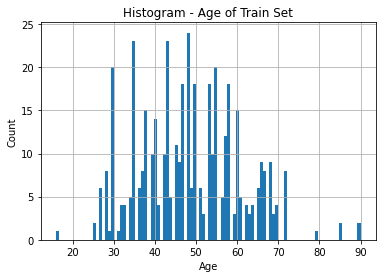

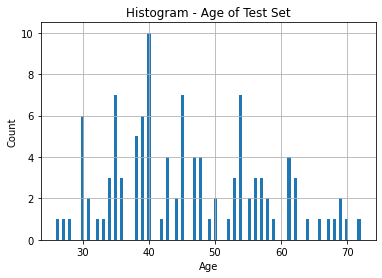

In [4]:
feature = 'Age' #showing ages' histograms
age_train = pd.DataFrame(X_train[feature])
age_test = pd.DataFrame(X_test[feature])
idx_na_train = age_train.index[age_train[feature].isna()].tolist()
idx_na_test = age_test.index[age_test[feature].isna()].tolist()

for i in idx_na_train:
    age_train.loc[i] = 1000
age_train.hist(bins = 100)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Age of Train Set')
plt.show()

for i in idx_na_test:
    age_test.loc[i] = 1000
age_test.hist(bins = 100)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram - Age of Test Set')
plt.show()

The differences between the histograms are acceptable since the majority of subjects are in the range of 25-70 in both groups (train and test) exept for a low number of outliers. 

b. Plots to show the relationship between feature and label.

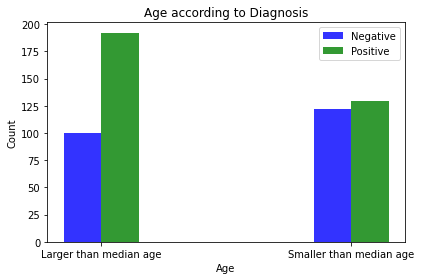

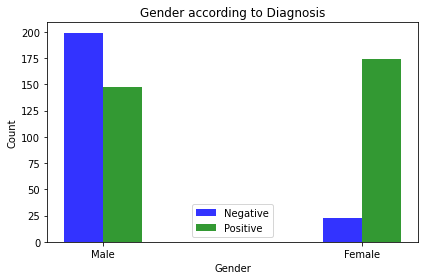

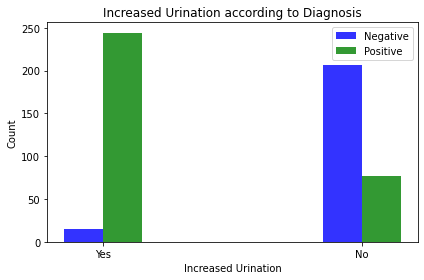

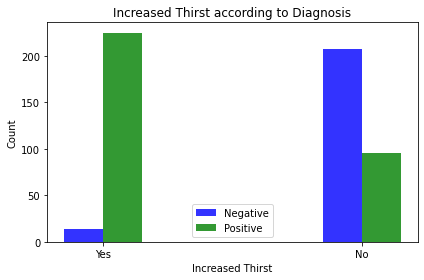

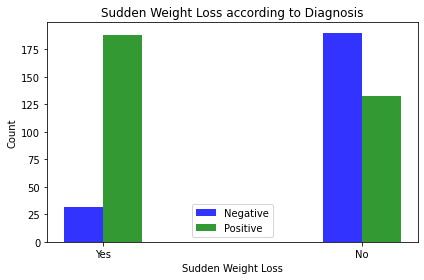

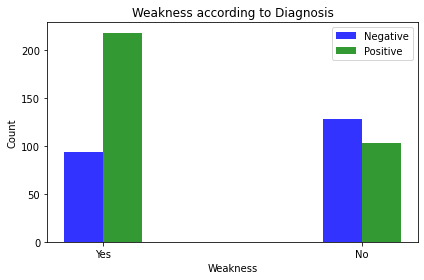

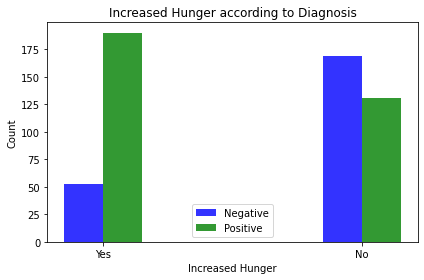

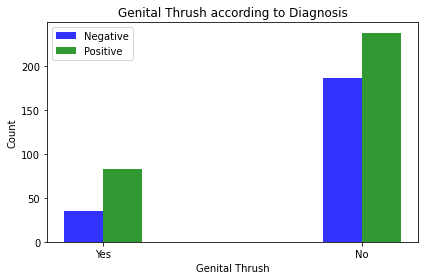

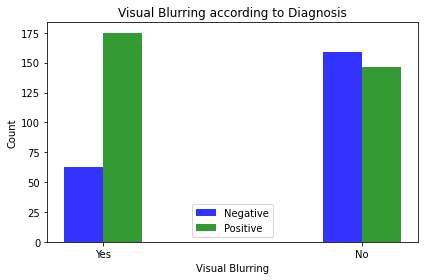

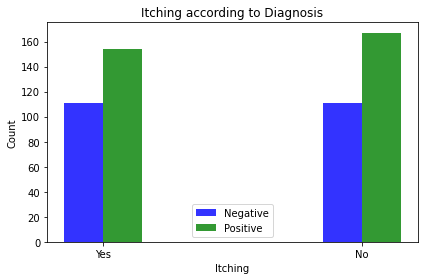

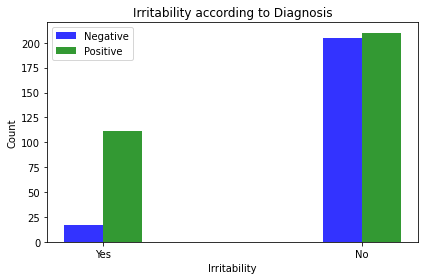

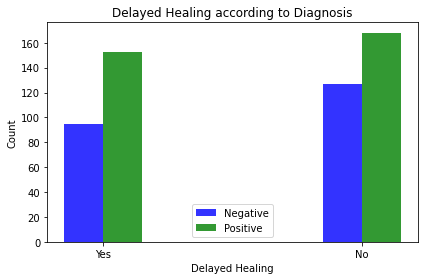

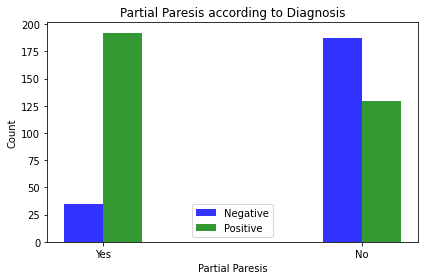

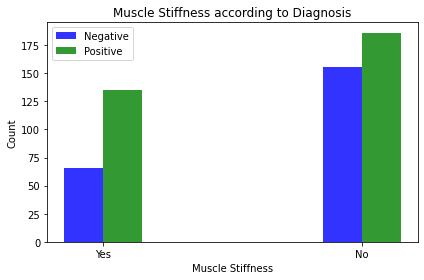

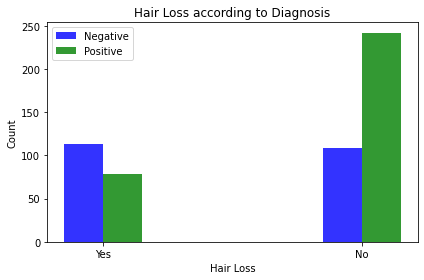

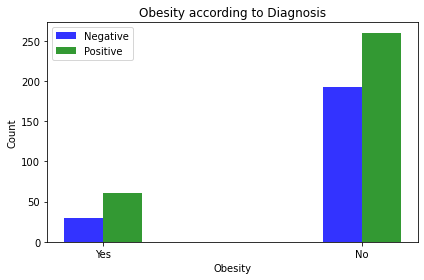

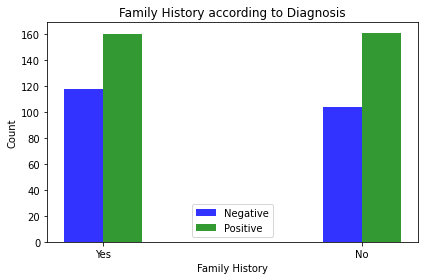

In [5]:
from funcs import label_analysis as an
calcs_DF = an(X,Y)

c. Additional plots that make sense given the mostly binary nature of this dataset. 

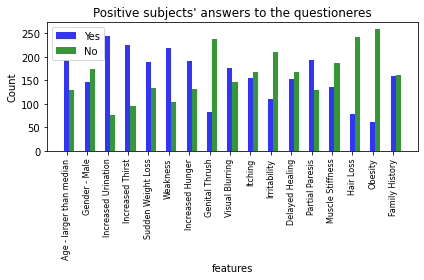

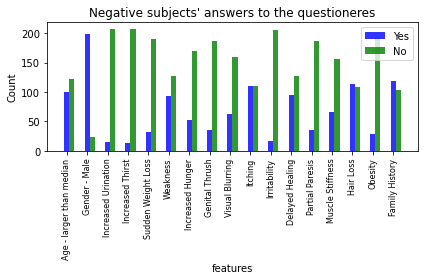

In [6]:
from funcs import feature_analysis as fe_an
relevant_features = fe_an(calcs_DF)

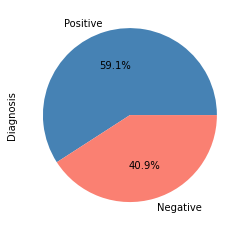

In [7]:
Y.value_counts().plot(kind="pie", labels=['Positive','Negative'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%') 
plt.show()

d. State any insights you have 

i. Was there anything unexpected? 

*Answer:* When looking at the plot of "gender according to Diagnosis", it shows that among the women that participated in this research; most of them were diagnosed as "Positive": 174 positive vs. 23 negative. The men, on the other hand, showed more balance: 147 positive men vs. 199 negative men.

ii. Are there any features that you feel will be particularly important to your model? Explain why. 

*Answer:* After exploring this data, we think that '*Increased Urination*','*Increased Thirst*' and '*Sudden Whight Loss*' will be the most relevant features for the model, since they include relatively significant differences between the Positive diagnosed and Negative diagnosed populations when looking at the answers given by those subjects (as can be seen in the last two graphs). These differences will help the model to perform better, in such way that it will make it easier to classify a new subject based on the differences in these features.

4) Encode all your data as one hot vectors. (5%)

In [8]:
from funcs import hot_vec as hv
[X_train_hv, X_test_hv, y_train_hv, y_test_hv] = hv(X_train, X_test, y_train, y_test, relevant_features)
all_features = list(X_train_hv.keys())
X_train_hv = X_train_hv.values
X_test_hv = X_test_hv.values
y_train_hv = y_train_hv.values
y_test_hv = y_test_hv.values

5) Choose, build and optimize Machine Learning Models: (20%) 

a. Use 5k cross fold validation and tune the models to achieve the highest test AUC:  

i. Train one or more linear model on your training set  

ii. Train one or more non-linear models on your training set  

b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC).  

**For linear models - LR with different penalties; a+b:**

11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 56.85it/s]


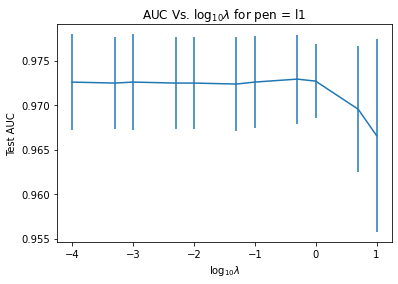

Best lambda value for pen = l1 is 0
11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 45.90it/s]


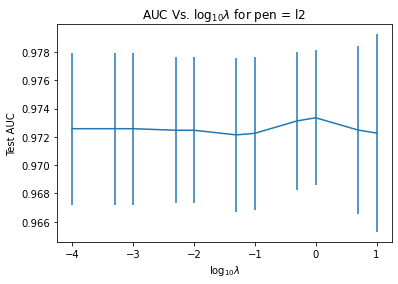

Best lambda value for pen = l2 is 1


In [9]:
from funcs import tune_lin_mod as tlm #tuning the linear models (with different penalties)
[solver1, AUC_vals1, lb1] = tlm(X_train_hv, y_train_hv, 'l1')
print('Best lambda value for pen = l1 is %i' % lb1)

[solver2, AUC_vals2, lb2] = tlm(X_train_hv, y_train_hv, 'l2')
print('Best lambda value for pen = l2 is %i' % lb2)

Next, we will train both of our linear models with the selected $\lambda$ values.

Results for LR with pen=l1 are:
Train Accuracy is 0.93. 
Train F1 is 0.94. 
Train AUROC is 0.98. 
Train Loss is 0.16. 
Test Accuracy is 0.89. 
Test F1 is 0.91. 
Test AUROC is 0.95. 
Test Loss is 0.28. 

Results for LR with pen=l2 are:
Train Accuracy is 0.94. 
Train F1 is 0.95. 
Train AUROC is 0.98. 
Train Loss is 0.16. 
Test Accuracy is 0.88. 
Test F1 is 0.90. 
Test AUROC is 0.96. 
Test Loss is 0.28. 


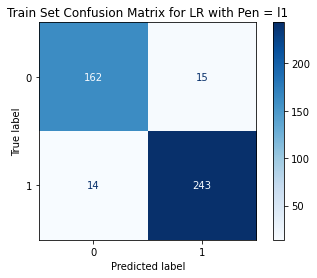

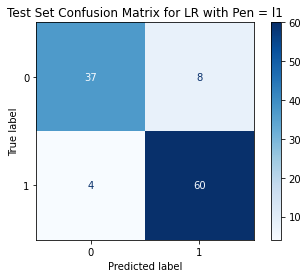

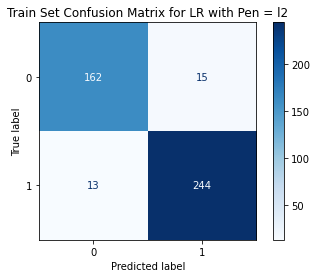

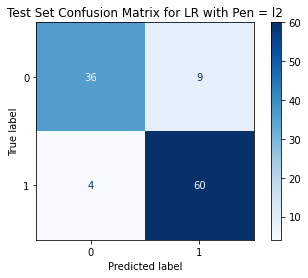

In [10]:
scaler = StandardScaler()
x_tr = scaler.fit_transform(X_train_hv) #scaling the training set
x_tst = scaler.transform(X_test_hv)

from funcs import train_lin_mod_and_calc as tlmac

[Acu_train_l1, F1_train_l1, AUROC_train_l1, Loss_train_l1, Acu_test_l1, F1_test_l1, AUROC_test_l1, Loss_test_l1] = tlmac(x_tr,x_tst,y_train_hv,y_test_hv,'l1',solver1,lb1)
print('Results for LR with pen=l1 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1,F1_train_l1,AUROC_train_l1,Loss_train_l1))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1,F1_test_l1,AUROC_test_l1,Loss_test_l1))

[Acu_train_l2, F1_train_l2, AUROC_train_l2, Loss_train_l2, Acu_test_l2, F1_test_l2, AUROC_test_l2, Loss_test_l2]  = tlmac(x_tr,x_tst,y_train_hv,y_test_hv,'l2',solver2,lb2)
print('\nResults for LR with pen=l2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2,F1_train_l2,AUROC_train_l2,Loss_train_l2))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2,F1_test_l2,AUROC_test_l2,Loss_test_l2))


**For non-linear models - non-linear SVM with different model degrees; a+b:**

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.983, test=0.943), f1=(train=0.985, test=0.951), precision=(train=0.990, test=0.942), recall=(train=0.981, test=0.961), roc_auc=(train=0.999, test=0.996), total=   0.1s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.988, test=0.931), f1=(train=0.990, test=0.940), precision=(train=0.986, test=0.959), recall=(train=0.995, test=0.922), roc_auc=(train=0.999, test=0.990), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.974, test=0.954), f1=(train=0.978, test=0.961), precision=(train=0.995, test=0.980), recall=(train=0.961, test=0.942), roc_auc=(train=0.99

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.977, test=0.966), f1=(train=0.980, test=0.970), precision=(train=0.990, test=1.000), recall=(train=0.971, test=0.942), roc_auc=(train=0.999, test=0.995), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.980, test=0.965), f1=(train=0.983, test=0.970), precision=(train=0.985, test=1.000), recall=(train=0.981, test=0.941), roc_auc=(train=0.999, test=0.993), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.954, test=0.897), f1=(train=0.961, test=0.914), precision=(train=0.966, test=0.889), recall=(train=0.956, test=0.941), roc_auc=(train=0.991, test=0.961), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2,

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    4.0s finished


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.983, test=0.943), f1=(train=0.985, test=0.951), precision=(train=0.990, test=0.942), recall=(train=0.981, test=0.961), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.988, test=0.931), f1=(train=0.990, test=0.940), precision=(train=0.986, test=0.959), recall=(train=0.995, test=0.922), roc_auc=(train=0.999, test=0.990), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.974, test=0.954), f1=(train=0.978, test=0.961), precision=(train=0.995, test=0.980), recall=(train=0.961, test=0.942), roc_auc=(train=0.99

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.980, test=0.965), f1=(train=0.983, test=0.970), precision=(train=0.985, test=1.000), recall=(train=0.981, test=0.941), roc_auc=(train=0.999, test=0.993), total=   0.1s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.986, test=0.943), f1=(train=0.988, test=0.951), precision=(train=0.995, test=0.942), recall=(train=0.981, test=0.961), roc_auc=(train=0.998, test=0.992), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.983, test=0.977), f1=(train=0.985, test=0.980), precision=(train=0.990, test=0.980), recall=(train=0.981, test=0.980), roc_auc=(train=0.999, test=0.996), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    3.6s finished


Final Results 
Results for Non-linear SVM with degree = 2 are:
Train Accuracy is 0.98. 
Train F1 is 0.98. 
Train AUROC is 1.00. 
Train Loss is 0.05. 
Test Accuracy is 0.93. 
Test F1 is 0.94. 
Test AUROC is 0.99. 
Test Loss is 0.15. 

Results for Non-linear SVM with degree = 3 are:
Train Accuracy is 0.98. 
Train F1 is 0.98. 
Train AUROC is 1.00. 
Train Loss is 0.05. 
Test Accuracy is 0.93. 
Test F1 is 0.94. 
Test AUROC is 0.99. 
Test Loss is 0.15. 


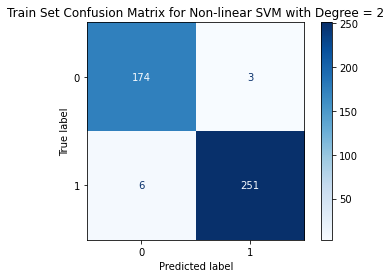

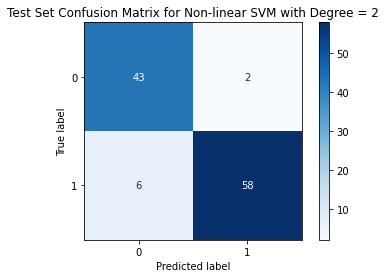

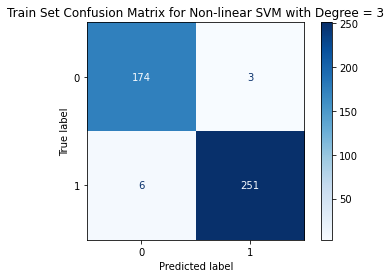

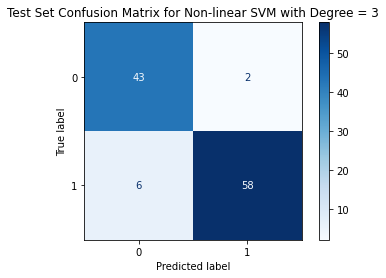

In [11]:
from funcs import train_nonlin_mod_and_calc as tnmac

[Acu_train_d2, F1_train_d2, AUROC_train_d2, Loss_train_d2, Acu_test_d2, F1_test_d2, AUROC_test_d2, Loss_test_d2] = tnmac(x_tr, x_tst, y_train_hv, y_test_hv, 2)
[Acu_train_d3, F1_train_d3, AUROC_train_d3, Loss_train_d3, Acu_test_d3, F1_test_d3, AUROC_test_d3, Loss_test_d3] = tnmac(x_tr, x_tst, y_train_hv, y_test_hv, 3)

print('Final Results \nResults for Non-linear SVM with degree = 2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2,F1_train_d2,AUROC_train_d2,Loss_train_d2))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2,F1_test_d2,AUROC_test_d2,Loss_test_d2))

print('\nResults for Non-linear SVM with degree = 3 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3,F1_train_d3,AUROC_train_d3,Loss_train_d3))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3,F1_test_d3,AUROC_test_d3,Loss_test_d3))


**To sum up the performance's results for all four selected models:**

In [12]:
print('Results for LR with pen=l1 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1,F1_train_l1,AUROC_train_l1,Loss_train_l1))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1,F1_test_l1,AUROC_test_l1,Loss_test_l1))

print('\nResults for LR with pen=l2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2,F1_train_l2,AUROC_train_l2,Loss_train_l2))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2,F1_test_l2,AUROC_test_l2,Loss_test_l2))


print('\nResults for Non-linear SVM with degree = 2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2,F1_train_d2,AUROC_train_d2,Loss_train_d2))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2,F1_test_d2,AUROC_test_d2,Loss_test_d2))


print('\nResults for Non-linear SVM with degree = 3 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3,F1_train_d3,AUROC_train_d3,Loss_train_d3))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3,F1_test_d3,AUROC_test_d3,Loss_test_d3))


Results for LR with pen=l1 are:
Train Accuracy is 0.93. 
Train F1 is 0.94. 
Train AUROC is 0.98. 
Train Loss is 0.16. 
Test Accuracy is 0.89. 
Test F1 is 0.91. 
Test AUROC is 0.95. 
Test Loss is 0.28. 

Results for LR with pen=l2 are:
Train Accuracy is 0.94. 
Train F1 is 0.95. 
Train AUROC is 0.98. 
Train Loss is 0.16. 
Test Accuracy is 0.88. 
Test F1 is 0.90. 
Test AUROC is 0.96. 
Test Loss is 0.28. 

Results for Non-linear SVM with degree = 2 are:
Train Accuracy is 0.98. 
Train F1 is 0.98. 
Train AUROC is 1.00. 
Train Loss is 0.05. 
Test Accuracy is 0.93. 
Test F1 is 0.94. 
Test AUROC is 0.99. 
Test Loss is 0.15. 

Results for Non-linear SVM with degree = 3 are:
Train Accuracy is 0.98. 
Train F1 is 0.98. 
Train AUROC is 1.00. 
Train Loss is 0.05. 
Test Accuracy is 0.93. 
Test F1 is 0.94. 
Test AUROC is 0.99. 
Test Loss is 0.15. 


c. What performs best on this dataset? Linear or non-linear models?

*Answer:* As can be seen from the results of the four selected models, the performance is significantly better when using the **non-linear models**. A possible explanation for this can be that our data is not linearly separable.

6) Feature Selection (10%) 

a. As seen previously, a Random Forest Network can be used to explore feature importance. Train a Random Forest on your data.  


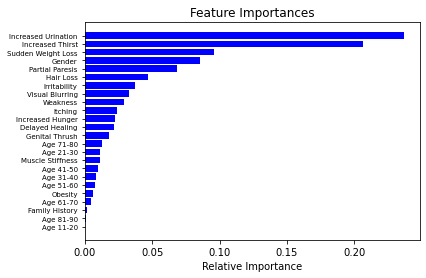

In [13]:
rfc = RandomForestClassifier(max_depth=4, random_state=0, criterion='gini')
rfc.fit(x_tr, y_train_hv)
y_pred_test_rfc = rfc.predict(x_tst)
y_pred_proba_test_rfc = rfc.predict_proba(x_tst)

features = all_features
importances =rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=7)
plt.xlabel('Relative Importance')
plt.show()

i. What are the 2 most important features according to the random forest.

*Answer:* As can be seen in the plot above, the two most important features, according to random forest, are "*Increased Urination*" and "*Increased Thirst*". 

ii. Does this match up exactly with the feature exploration you did?

*Answer:* As can be seen from the plots relevant for the feature exploration part, the most relevant features we have found were 'Increased Urination','Increased Thirst' and 'Sudden Whight Loss'. The conclusion from training a random forest model on our data is exactly identicle for the top three features. 

However, we have seen that "Gender" was ranked fourth in its importance, which did surprise us.

7) Data Separability Visualization: (20%) 

a. Perform dimensionality reduction on the dataset so that you can plot your data in a 2d plot (show samples with positive and negative labels in different colors).   

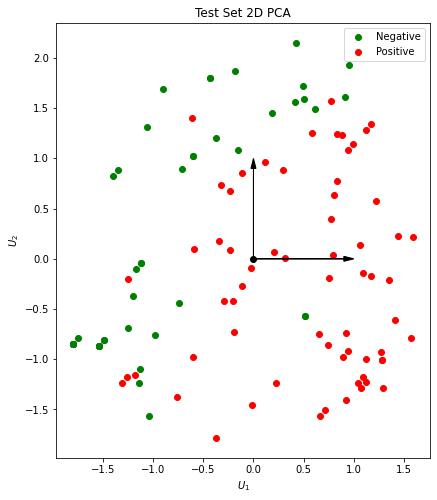

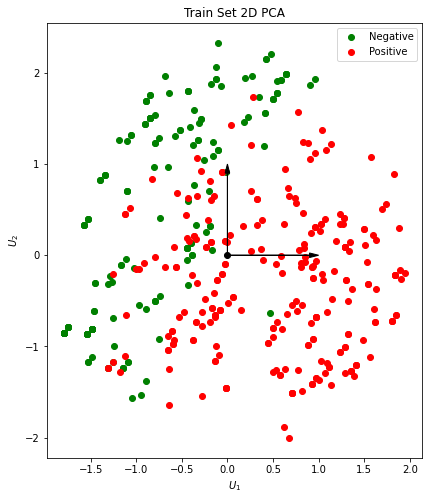

In [15]:
pca = PCA(n_components=2, whiten=True)
X_train_ = scaler.fit_transform(X_train_hv)
X_test_ = scaler.transform(X_test_hv)
X_train_pca = pca.fit_transform(X_train_) #perform dimensionality reduction on the scaled dataset
X_test_pca = pca.transform(X_test_)

from funcs import plt_2d_pca
plt_2d_pca(X_test_pca,y_test_hv,'Test')
plt_2d_pca(X_train_pca,y_train_hv,'Train')

b. How separable is your data when reduced to just two features? 

*Answer:* As can be seen from the plots, both the train set and the test set are not linearly separable after being reduced to just two features. The test set is a little more separable than the train set, but is still not separable enough.

c. Train the same models above on the dimensionality-reduced training set. 

11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 58.17it/s]


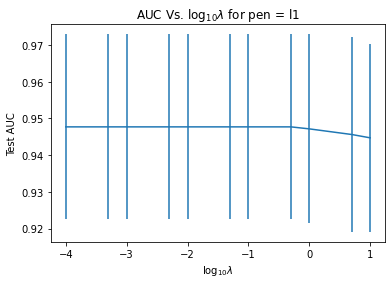

Best lambda value after PCA for pen = l1 is 0
11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 16.11it/s]


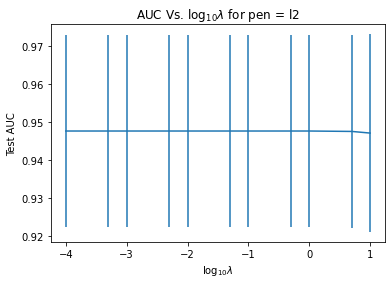

Best lambda value after PCA for pen = l2 is 0
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.95. 
Train Loss is 0.28. 
Test Accuracy is 0.84. 
Test F1 is 0.87. 
Test AUROC is 0.92. 
Test Loss is 0.37. 
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.95. 
Train Loss is 0.28. 
Test Accuracy is 0.84. 
Test F1 is 0.87. 
Test AUROC is 0.92. 
Test Loss is 0.37. 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.896, test=0.874), f1=(train=0.912, test=0.901), precision=(train=0.917, test=0.833), recall=(train=0.908, test=0.980), roc_auc=(train=0.960, test=0.963), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.876, test=0.885), f1=(train=0.895, test=0.902), precision=(train=0.901, test=0.902), recall=(train=0.888, test=0.902), roc_auc=(train=0.963, test=0.966), total=   0.2s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.908, test=0.828), f1=(train=0.922, test=0.860), precision=(train=0.922, test=0.836), recall=(train=0.922, test=0.885), roc_auc=(train=0.972, test=0.904), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.888, test=0.897), f1=(train=0.905, test=0.909), precision=(train=0.907, test=0.957), recall=(train=0.902, test=0.865), roc_auc=(train=0.962, test=0.966), total=   0.1s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, 

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.735, test=0.782), f1=(train=0.801, test=0.822), precision=(train=0.723, test=0.786), recall=(train=0.898, test=0.863), roc_auc=(train=0.715, test=0.861), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.746, test=0.655), f1=(train=0.806, test=0.754), precision=(train=0.735, test=0.657), recall=(train=0.893, test=0.885), roc_auc=(train=0.765, test=0.671), total=   0.1s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.741, test=0.747), f1=(train=0.804, test=0.800), precision=(train=0.725, test=0.759), recall=(train=0.902, test=0.846), roc_auc=(train=0.749, test=0.734), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   13.6s finished


Train Accuracy is 0.91. 
Train F1 is 0.92. 
Train AUROC is 0.97. 
Train Loss is 0.25. 
Test Accuracy is 0.89. 
Test F1 is 0.91. 
Test AUROC is 0.95. 
Test Loss is 0.32. 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.896, test=0.874), f1=(train=0.912, test=0.901), precision=(train=0.917, test=0.833), recall=(train=0.908, test=0.980), roc_auc=(train=0.960, test=0.963), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.876, test=0.885), f1=(train=0.895, test=0.902), precision=(train=0.901, test=0.902), recall=(train=0.888, test=0.902), roc_auc=(train=0.963, test=0.966), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.890, test=0.897), f1=(train=0.911, test=0.914), precision=(train=0.878, test=0.889), recall=(train=0.947, test=0.941), roc_auc=(train=0.965, test=0.975), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.902, test=0.839), f1=(train=0.920, test=0.873), precision=(train=0.890, test=0.828), recall=(train=0.951, test=0.923), roc_auc=(train=0.974, test=0.934), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.888, test=0.920), f1=(train=0.910, test=0.933), precision=(train=0.867, test=0.925), recall=(train=0.956, test=0.942), roc_auc=(train=0.966, test=0.972), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    6.7s finished


Train Accuracy is 0.89. 
Train F1 is 0.91. 
Train AUROC is 0.97. 
Train Loss is 0.25. 
Test Accuracy is 0.91. 
Test F1 is 0.92. 
Test AUROC is 0.94. 
Test Loss is 0.30. 


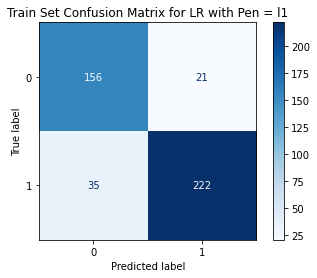

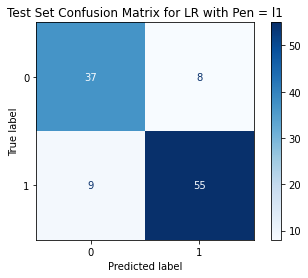

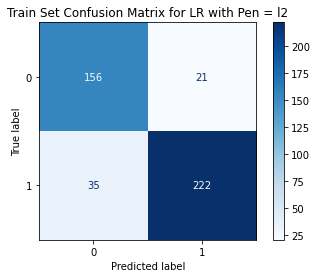

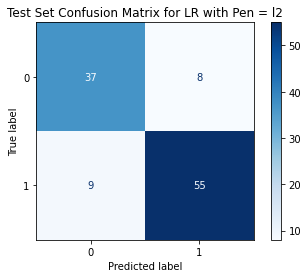

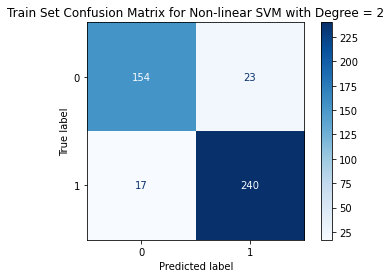

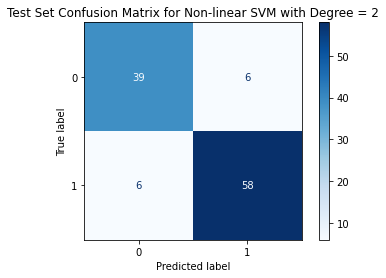

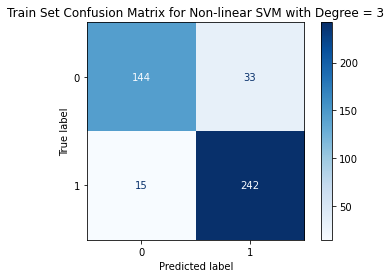

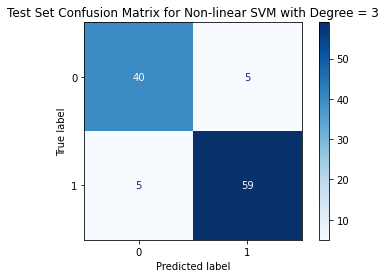

In [16]:
#Linear models:
from funcs import tune_lin_mod_pca as tlm_pca #finding the best lambda values for each penalty
[solver1_pca, AUC_vals1_pca, lb1_pca] = tlm_pca(X_train_hv, y_train_hv, 'l1',pca)
print('Best lambda value after PCA for pen = l1 is %i' % lb1_pca)
[solver2_pca, AUC_vals2_pca, lb2_pca] = tlm_pca(X_train_hv, y_train_hv, 'l2',pca)
print('Best lambda value after PCA for pen = l2 is %i' % lb2_pca)

#training the linear models with the optimal lambdas found above
[Acu_train_l1_pca, F1_train_l1_pca, AUROC_train_l1_pca, Loss_train_l1_pca, Acu_test_l1_pca, F1_test_l1_pca, AUROC_test_l1_pca, Loss_test_l1_pca] = tlmac(X_train_pca,X_test_pca,y_train_hv,y_test_hv,'l1',solver1_pca,lb1_pca)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1_pca,F1_train_l1_pca,AUROC_train_l1_pca,Loss_train_l1_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1_pca,F1_test_l1_pca,AUROC_test_l1_pca,Loss_test_l1_pca))

[Acu_train_l2_pca, F1_train_l2_pca, AUROC_train_l2_pca, Loss_train_l2_pca, Acu_test_l2_pca, F1_test_l2_pca, AUROC_test_l2_pca, Loss_test_l2_pca]  = tlmac(X_train_pca,X_test_pca,y_train_hv,y_test_hv,'l2',solver2_pca,lb2_pca)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2_pca,F1_train_l2_pca,AUROC_train_l2_pca,Loss_train_l2_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2_pca,F1_test_l2_pca,AUROC_test_l2_pca,Loss_test_l2_pca))


#Non-Linear models:
[Acu_train_d2_pca, F1_train_d2_pca, AUROC_train_d2_pca, Loss_train_d2_pca, Acu_test_d2_pca, F1_test_d2_pca, AUROC_test_d2_pca, Loss_test_d2_pca] = tnmac(X_train_pca, X_test_pca, y_train_hv, y_test_hv, 2)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2_pca,F1_train_d2_pca,AUROC_train_d2_pca,Loss_train_d2_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2_pca,F1_test_d2_pca,AUROC_test_d2_pca,Loss_test_d2_pca))

[Acu_train_d3_pca, F1_train_d3_pca, AUROC_train_d3_pca, Loss_train_d3_pca, Acu_test_d3_pca, F1_test_d3_pca, AUROC_test_d3_pca, Loss_test_d3_pca] = tnmac(X_train_pca, X_test_pca, y_train_hv, y_test_hv, 3)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3_pca,F1_train_d3_pca,AUROC_train_d3_pca,Loss_train_d3_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3_pca,F1_test_d3_pca,AUROC_test_d3_pca,Loss_test_d3_pca))

**To sum up the performance's results after PCA for all four selected models:**

In [17]:
print('Results for LR with pen=l1 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1_pca,F1_train_l1_pca,AUROC_train_l1_pca,Loss_train_l1_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1_pca,F1_test_l1_pca,AUROC_test_l1_pca,Loss_test_l1_pca))


print('\nResults for LR with pen=l2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2_pca,F1_train_l2_pca,AUROC_train_l2_pca,Loss_train_l2_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2_pca,F1_test_l2_pca,AUROC_test_l2_pca,Loss_test_l2_pca))


print('\nResults for Non-linear SVM with degree = 2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2_pca,F1_train_d2_pca,AUROC_train_d2_pca,Loss_train_d2_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2_pca,F1_test_d2_pca,AUROC_test_d2_pca,Loss_test_d2_pca))


print('\nResults for Non-linear SVM with degree = 3 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3_pca,F1_train_d3_pca,AUROC_train_d3_pca,Loss_train_d3_pca))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3_pca,F1_test_d3_pca,AUROC_test_d3_pca,Loss_test_d3_pca))

Results for LR with pen=l1 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.95. 
Train Loss is 0.28. 
Test Accuracy is 0.84. 
Test F1 is 0.87. 
Test AUROC is 0.92. 
Test Loss is 0.37. 

Results for LR with pen=l2 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.95. 
Train Loss is 0.28. 
Test Accuracy is 0.84. 
Test F1 is 0.87. 
Test AUROC is 0.92. 
Test Loss is 0.37. 

Results for Non-linear SVM with degree = 2 are:
Train Accuracy is 0.91. 
Train F1 is 0.92. 
Train AUROC is 0.97. 
Train Loss is 0.25. 
Test Accuracy is 0.89. 
Test F1 is 0.91. 
Test AUROC is 0.95. 
Test Loss is 0.32. 

Results for Non-linear SVM with degree = 3 are:
Train Accuracy is 0.89. 
Train F1 is 0.91. 
Train AUROC is 0.97. 
Train Loss is 0.25. 
Test Accuracy is 0.91. 
Test F1 is 0.92. 
Test AUROC is 0.94. 
Test Loss is 0.30. 


d. Train the same models on the best two features from section 6.  

11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 94.40it/s]


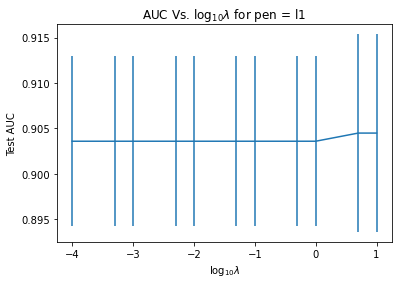

Best lambda value of 2-features data for pen = l1 is 5
11/11 lambda values, processed folds: 100%|██████████████████████████████████████████████| 5/5 [00:00<00:00, 41.69it/s]


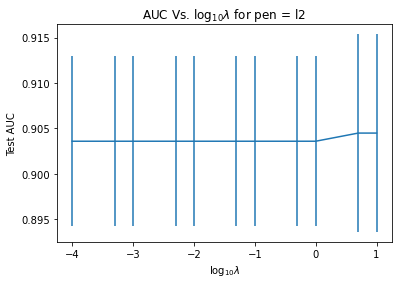

Best lambda value of 2-features data for pen = l2 is 5
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.33. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.33. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.870, test=0.874), f1=(train=0.887, test=0.891), precision=(train=0.917, test=0.900), recall=(train=0.859, test=0.882), roc_auc=(train=0.908, test=0.908), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.870, test=0.874), f1=(train=0.888, test=0.889), precision=(train=0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.876, test=0.851), f1=(train=0.892, test=0.871), precision=(train=0.918, test=0.898), recall=(train=0.868, test=0.846), roc_auc=(train=0.842, test=0.812), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.870, test=0.874), f1=(train=0.888, test=0.889), precision=(train=0.908, test=0.936), recall=(train=0.868, test=0.846), roc_auc=(train=0.833, test=0.851), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=2, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.868, test=0.884), f1=(train=0.885, test=0.900), precision=(train=0.912, test=0.918), recall=(train=0.859, test=0.882), roc_auc=(train=0.835, test=0.845), total=   0.0s
[CV] svm__C=1, svm__degree=2, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.3s finished


Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.37. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.88. 
Test Loss is 0.45. 
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.870, test=0.874), f1=(train=0.887, test=0.891), precision=(train=0.917, test=0.900), recall=(train=0.859, test=0.882), roc_auc=(train=0.908, test=0.908), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf, accuracy=(train=0.870, test=0.874), f1=(train=0.888, test=0.889), precision=(train=0.913, test=0.917), recall=(train=0.864, test=0.863), roc_auc=(train=0.876, test=0.836), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=rbf ......
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.876, test=0.851), f1=(train=0.892, test=0.871), precision=(train=0.918, test=0.898), recall=(train=0.868, test=0.846), roc_auc=(train=0.913, test=0.891), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.870, test=0.874), f1=(train=0.888, test=0.889), precision=(train=0.908, test=0.936), recall=(train=0.868, test=0.846), roc_auc=(train=0.910, test=0.899), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly .....
[CV]  svm__C=1, svm__degree=3, svm__gamma=scale, svm__kernel=poly, accuracy=(train=0.868, test=0.884), f1=(train=0.885, test=0.900), precision=(train=0.912, test=0.918), recall=(train=0.859, test=0.882), roc_auc=(train=0.905, test=0.923), total=   0.0s
[CV] svm__C=1, svm__degree=3, svm__gamma=auto, svm__kernel=rbf .......
[CV]  svm__C=1, svm__degree=

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    2.6s finished


Best parameters for this model are:
{'svm__C': 10, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'poly'}
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.32. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 


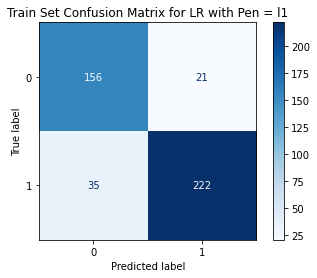

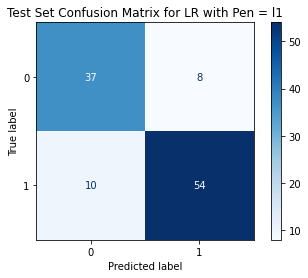

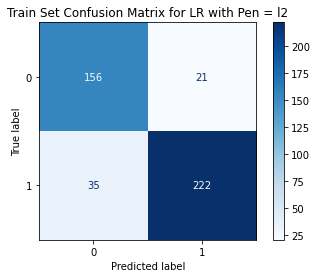

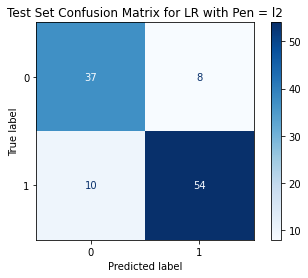

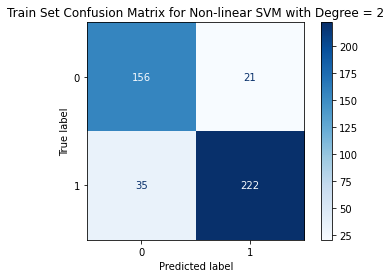

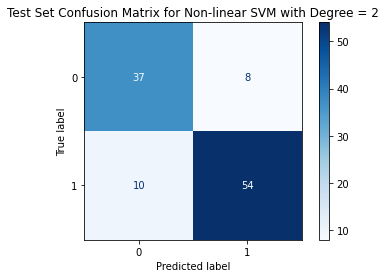

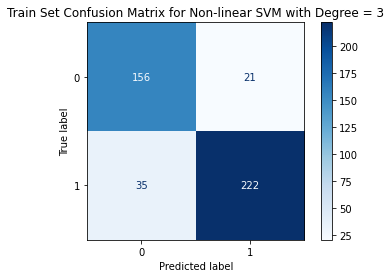

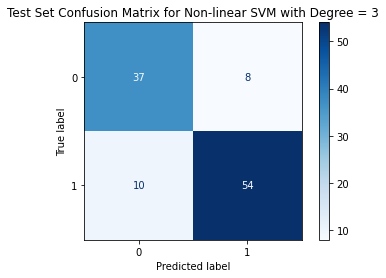

In [18]:
X_train_2feat = X_train_hv[:,[1,2]] #selecting the data from the relevant features
X_test_2feat = X_test_hv[:,[1,2]]
X_tr_2feat = scaler.fit_transform(X_train_2feat)
X_tst_2feat = scaler.transform(X_test_2feat)

#Linear models
#tuning the LR model with the updated data
[solver1_2feat, AUC_vals1_2feat, lb1_2feat] = tlm(X_train_2feat, y_train_hv, 'l1')
print('Best lambda value of 2-features data for pen = l1 is %i' % lb1_2feat)
[solver2_2feat, AUC_vals2_2feat, lb2_2feat] = tlm(X_train_2feat, y_train_hv, 'l2')
print('Best lambda value of 2-features data for pen = l2 is %i' % lb2_2feat)

#training the linear models with the optimal lambdas found above
[Acu_train_l1_2feat, F1_train_l1_2feat, AUROC_train_l1_2feat, Loss_train_l1_2feat, Acu_test_l1_2feat, F1_test_l1_2feat, AUROC_test_l1_2feat, Loss_test_l1_2feat] = tlmac(X_tr_2feat,X_tst_2feat,y_train_hv,y_test_hv,'l1',solver1_2feat,lb1_2feat)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1_2feat,F1_train_l1_2feat,AUROC_train_l1_2feat,Loss_train_l1_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1_2feat,F1_test_l1_2feat,AUROC_test_l1_2feat,Loss_test_l1_2feat))

[Acu_train_l2_2feat, F1_train_l2_2feat, AUROC_train_l2_2feat, Loss_train_l2_2feat, Acu_test_l2_2feat, F1_test_l2_2feat, AUROC_test_l2_2feat, Loss_test_l2_2feat]  = tlmac(X_tr_2feat,X_tst_2feat,y_train_hv,y_test_hv,'l2',solver2_2feat,lb2_2feat)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2_2feat,F1_train_l2_2feat,AUROC_train_l2_2feat,Loss_train_l2_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2_2feat,F1_test_l2_2feat,AUROC_test_l2_2feat,Loss_test_l2_2feat))

#Non-linear models:
[Acu_train_d2_2feat, F1_train_d2_2feat, AUROC_train_d2_2feat, Loss_train_d2_2feat, Acu_test_d2_2feat, F1_test_d2_2feat, AUROC_test_d2_2feat, Loss_test_d2_2feat] = tnmac(X_tr_2feat, X_tst_2feat, y_train_hv, y_test_hv, 2)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2_2feat,F1_train_d2_2feat,AUROC_train_d2_2feat,Loss_train_d2_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2_2feat,F1_test_d2_2feat,AUROC_test_d2_2feat,Loss_test_d2_2feat))

[Acu_train_d3_2feat, F1_train_d3_2feat, AUROC_train_d3_2feat, Loss_train_d3_2feat, Acu_test_d3_2feat, F1_test_d3_2feat, AUROC_test_d3_2feat, Loss_test_d3_2feat] = tnmac(X_tr_2feat, X_tst_2feat, y_train_hv, y_test_hv, 3)
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3_2feat,F1_train_d3_2feat,AUROC_train_d3_2feat,Loss_train_d3_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3_2feat,F1_test_d3_2feat,AUROC_test_d3_2feat,Loss_test_d3_2feat))

**To sum up the performance's results with the best two features for all four selected models:**

In [19]:
print('Results for LR with pen=l1 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l1_2feat,F1_train_l1_2feat,AUROC_train_l1_2feat,Loss_train_l1_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l1_2feat,F1_test_l1_2feat,AUROC_test_l1_2feat,Loss_test_l1_2feat))

print('\nResults for LR with pen=l2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_l2_2feat,F1_train_l2_2feat,AUROC_train_l2_2feat,Loss_train_l2_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_l2_2feat,F1_test_l2_2feat,AUROC_test_l2_2feat,Loss_test_l2_2feat))

print('\nResults for Non-linear SVM with degree = 2 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d2_2feat,F1_train_d2_2feat,AUROC_train_d2_2feat,Loss_train_d2_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d2_2feat,F1_test_d2_2feat,AUROC_test_d2_2feat,Loss_test_d2_2feat))

print('\nResults for Non-linear SVM with degree = 3 are:')
print('Train Accuracy is {:.2f}. \nTrain F1 is {:.2f}. \nTrain AUROC is {:.2f}. \nTrain Loss is {:.2f}. '.format(Acu_train_d3_2feat,F1_train_d3_2feat,AUROC_train_d3_2feat,Loss_train_d3_2feat))
print('Test Accuracy is {:.2f}. \nTest F1 is {:.2f}. \nTest AUROC is {:.2f}. \nTest Loss is {:.2f}. '.format(Acu_test_d3_2feat,F1_test_d3_2feat,AUROC_test_d3_2feat,Loss_test_d3_2feat))

Results for LR with pen=l1 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.33. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 

Results for LR with pen=l2 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.33. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 

Results for Non-linear SVM with degree = 2 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.37. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.88. 
Test Loss is 0.45. 

Results for Non-linear SVM with degree = 3 are:
Train Accuracy is 0.87. 
Train F1 is 0.89. 
Train AUROC is 0.91. 
Train Loss is 0.32. 
Test Accuracy is 0.83. 
Test F1 is 0.86. 
Test AUROC is 0.89. 
Test Loss is 0.37. 


e. What performs better? 2 features of the reduced dimensionality.

*Answer:* As can be seen in the summary results of each section, the models performed better on *the dimentionality-reduced data* (sec. C). The comparison included the AUROC values of the different models on the two different "data sets". A possible explanation for this might be that the dimentionality-reduced data contained a more accurate and relevant data for that prediction. 